<a href="https://colab.research.google.com/github/totheBrenda/portfolio/blob/main/p001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

# **Data preprocessing**

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Files/pf/p1.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1. Processing missing values
Out of a total of 16,598 data entries, the 357 rows with missing values represent less than 3% of the entire dataset.

Therefore, I have decided to remove them as they are not expected to significantly impact the data analysis.

In [3]:
df = df.dropna()

### 2. Year
The year representation is inconsistently formatted, so I will standardize it by converting all years into four-digit integers.

In [ ]:
def filter(year) :
  if 0 <= year <= 20:
    return int(year) + 2000
  elif 80 <= year <= 99 :
    return int(year) + 1900
  else :
    return int(year)

df['Year'] = df['Year'].apply(filter)

### 3. Sales
Some entries in the Sales column are expressed using K or M units.

I will standardize format them as float and the units to M.

In [ ]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

def flo(sales) :
  if 'M' in sales :
    r1 = float(sales.replace('M', ''))
    return r1
  elif 'K' in sales :
    r2 = float(sales.replace('K', '')) / 1000
    return r2
  else :
    return float(sales)

for col in cols :
  df[col] = df[col].apply(flo)


# EDA

### 1. Identifying Preferred Game Genres by Region

Since sales volumes vary by region, comparisons are made using standardized values.

In [ ]:
eda1 = df.groupby('Genre').sum().drop('Year', axis=1).reset_index()
idx1 = eda1['Genre']
eda1 = pd.DataFrame(StandardScaler().fit_transform(eda1.drop('Genre', axis=1)),
                    columns=cols, index=idx1) + 1.25

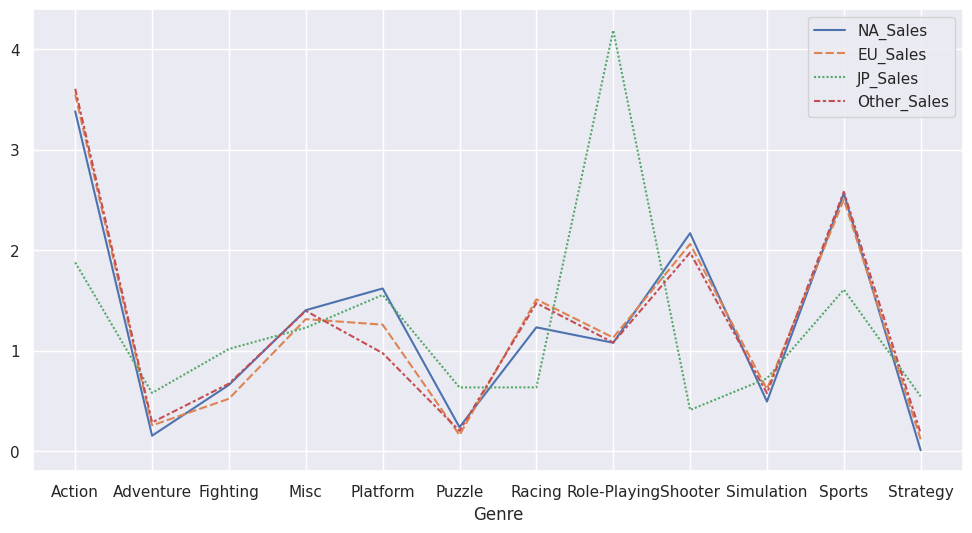

In [7]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.lineplot(data=eda1);

### 2. Identifying Trends in Games by Year
I calculate the total sales revenue for each genre and identify the top 5 genres.

In [8]:
eda2 = df.drop('Year', axis=1).groupby('Genre').sum()
eda2['total'] = eda2.sum(axis=1)
eda2 = eda2.sort_values('total', ascending=False)
idx2 = eda2.index[:5]
eda2.head(5)

<ipython-input-8-a2916858aad8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eda2 = df.drop('Year', axis=1).groupby('Genre').sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Sports,667.26,370.97,134.76,132.35,1305.34
Shooter,574.48,310.23,38.18,101.86,1024.75
Role-Playing,318.76,183.09,342.93,56.73,901.51
Platform,445.38,200.63,130.53,51.45,827.99


In [ ]:
eda2_grouped = df[df['Genre'].isin(idx2)].groupby(['Year', 'Genre']).sum().reset_index()

def genreplot(genre) :
  eda2_plot = eda2_grouped[(eda2_grouped.Genre == genre)]
  eda2_plot = eda2_plot[eda2_plot.Year <= 2015].set_index('Year')
  sns.set(rc={"figure.figsize":(12, 6)})
  sns.lineplot(data=eda2_plot).set_title(f'{genre}');

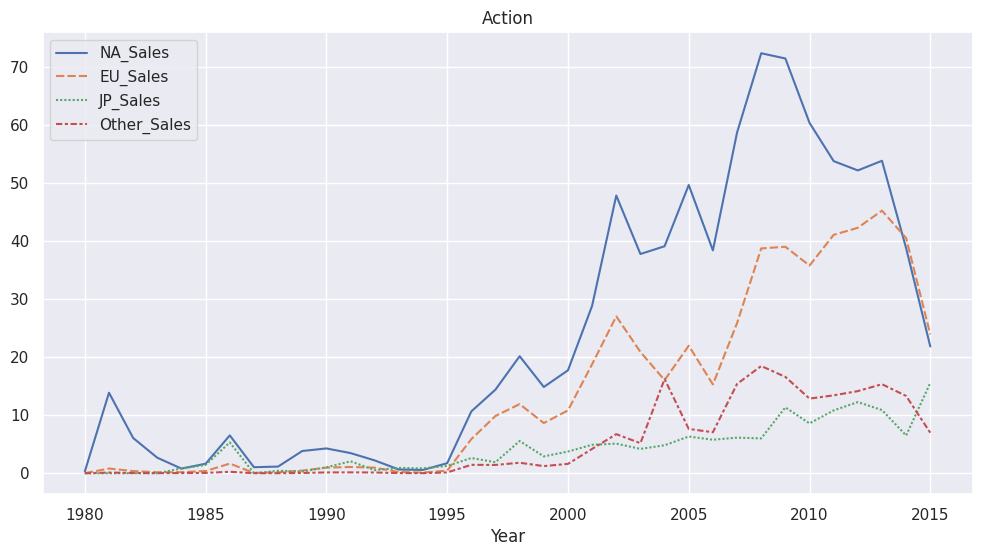

In [10]:
genreplot('Action')

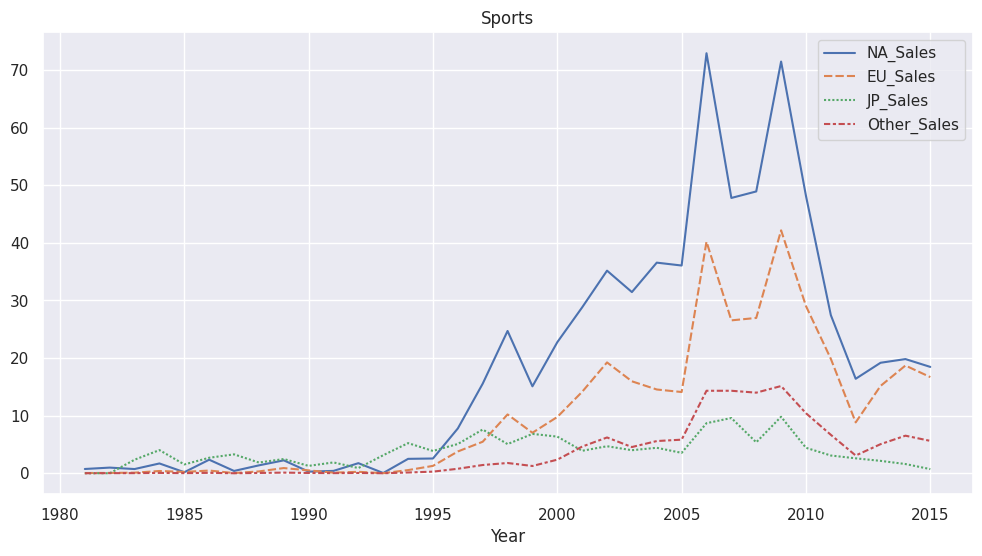

In [11]:
genreplot('Sports')

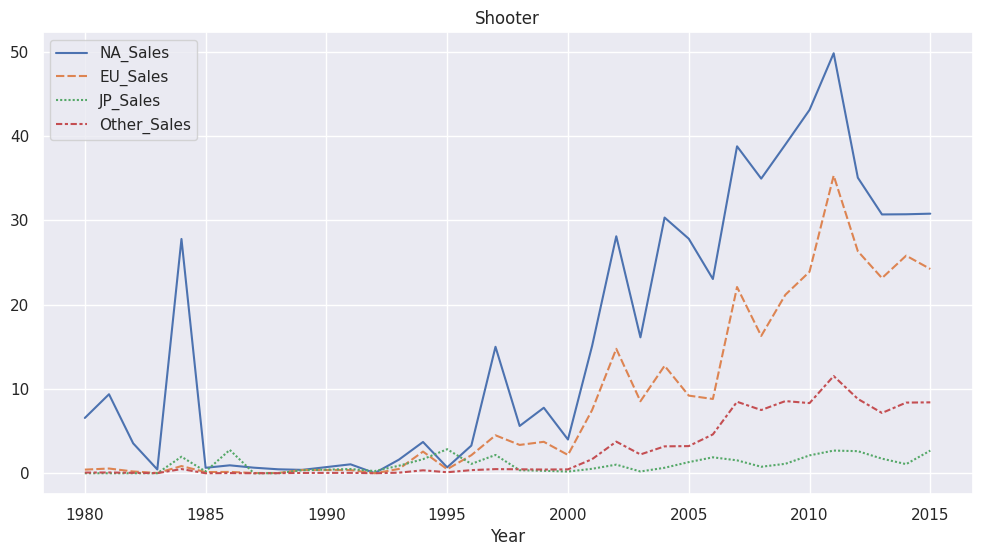

In [12]:
genreplot('Shooter')

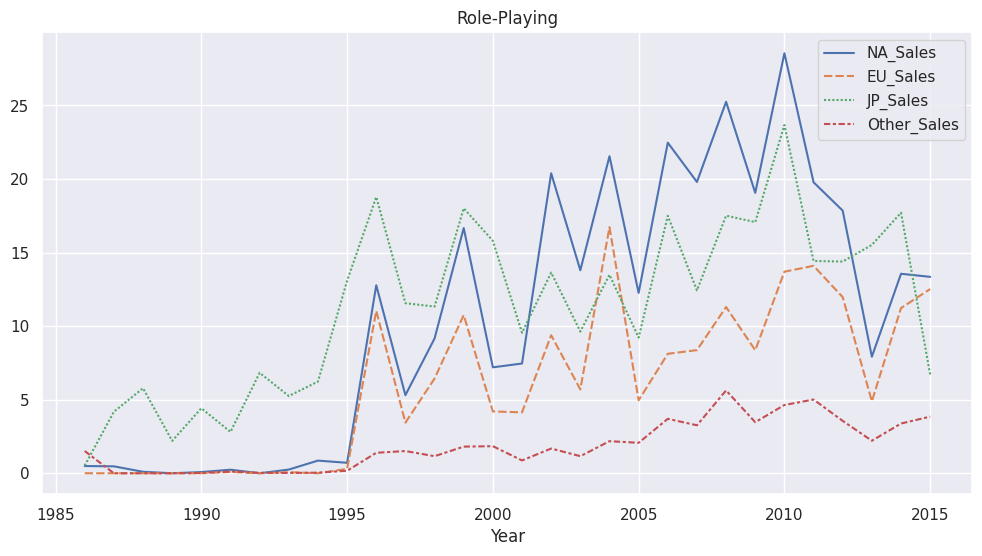

In [13]:
genreplot('Role-Playing')

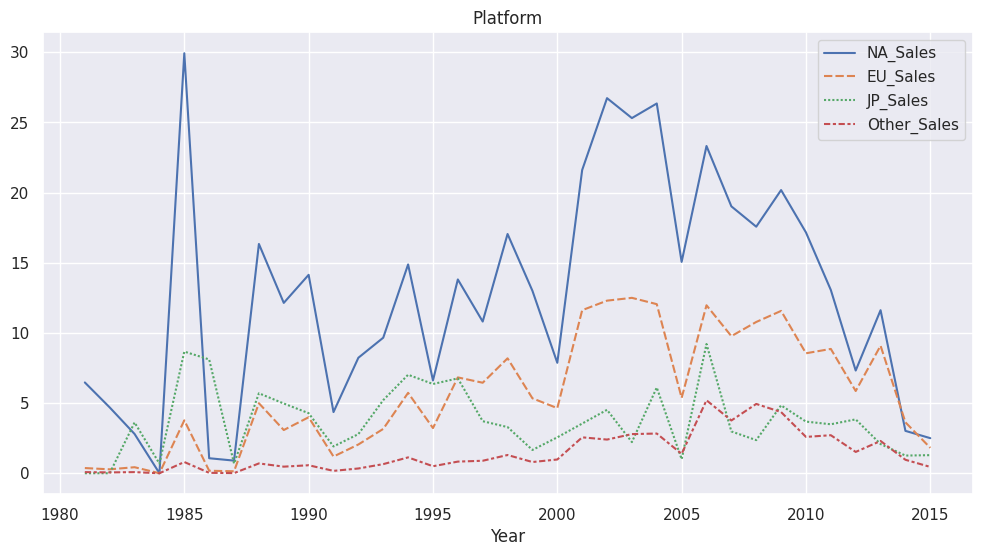

In [14]:
genreplot('Platform')

### 3. Identifying the Platforms of Released Games
I calculate the total sales revenue for each game and identify the platforms of the top 50 games.

In [ ]:
df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [16]:
eda3 = pd.DataFrame(df.sort_values('total', ascending=False).head(50).\
                    Platform.value_counts()).reset_index()
eda3.columns = ['Platform', 'Counts']
eda3

,Platform,Counts
0,Wii,9
1,DS,9
2,X360,7
3,GB,6
4,PS2,5
5,PS3,4
6,NES,3
7,PS4,2
8,3DS,2
9,SNES,1


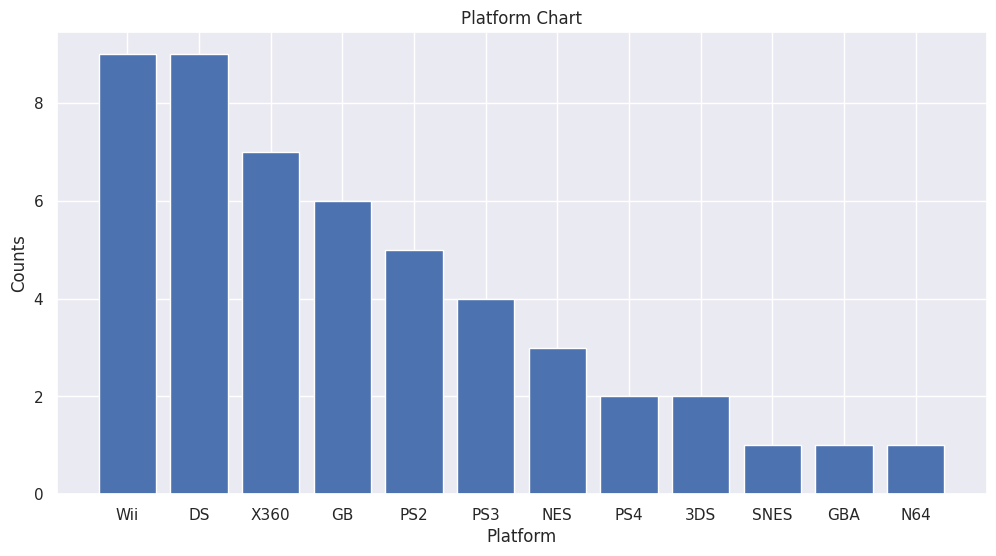

In [17]:
x, y = eda3.Platform, eda3.Counts
plt.title('Platform Chart')
plt.bar(x, y)
plt.xlabel('Platform')
plt.ylabel('Counts')
plt.show();

# Conclusion
Popular games worldwide include 'Action', 'Sports', 'Shooting', 'Role-Playing', and 'Platform' genres.

However, while 'Role-Playing' games enjoy particular popularity in Japan,

'Shooting' games are less favored there, indicating regional preferences.

Interestingly, 'Shooting' games have maintained relatively high popularity since 2015,

with steady sales growth even in regions like Japan where revenues were initially lower.

Analysis of popular game platforms reveals a significant presence of Wii and DS.

Based on this, I believe that releasing a 'Shooting' game utilizing Wii or DS platforms could garner considerable popularity globally.